<a href="https://colab.research.google.com/github/Dario-Zela/Neural-Networks-Test/blob/main/Language_Model_(MLP_without_pytorch).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import string
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
words = open("names.txt", "r").read().splitlines()
chars = string.ascii_lowercase
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi["."] = 0
itos = {i:s for s,i in stoi.items()}
vocab_size = len(itos)

In [ ]:
block_size = 3

def build_dataset(words):
  X, Y = [], []

  for w in words:
    context = [0] * block_size
    for c in w+".":
      ix = stoi[c]
      X.append(context)
      Y.append(ix)
      context = context[1:] + [ix]
  return torch.tensor(X), torch.tensor(Y)

import random
random.shuffle(words)

n1 = int(0.8 * len(words))
n2 = int(0.9 * len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

In [ ]:
n_embed = 2
n_hidden = 200

C = torch.randn((vocab_size, n_embed))
W1 = torch.randn((n_embed * block_size, n_hidden))
W2 = torch.randn((n_hidden, vocab_size))
B2 = torch.randn(vocab_size) * 0

bngain = torch.ones((1, n_hidden))
bnbias = torch.zeros((1, n_hidden))

bnmean = torch.zeros((1, n_hidden))
bnstd = torch.ones((1, n_hidden))

parameters = [C, W1, W2, B2, bngain, bnbias]
for p in parameters:
  p.requires_grad = True

In [ ]:
max_step = 10000
batch_size = 32
lossi = []

for i in range(max_step):

  ix = torch.randint(0,Xtr.shape[0], (32,))

  emb = C[Xtr[ix]]
  h = emb.view(emb.shape[0], -1) @ W1

  bnmeani = h.mean(0, keepdim= True)
  bnstdi = h.std(0, keepdim= True)

  h = bngain * (h - bnmeani) / bnstdi + bnbias
  h = torch.tanh(h)

  with torch.no_grad():
    bnmean = 0.999 * bnmean + 0.001 * bnmeani
    bnstd = 0.999 * bnstd + 0.001 * bnstdi

  logits = h @ W2 + B2
  loss = F.cross_entropy(logits, Ytr[ix])

  for p in parameters:
    p.grad = None

  loss.backward()

  lr = 0.1 if i < 10000 else 0.01

  for p in parameters:
    p.data += - lr * p.grad

  if i % 1000 == 0:
    print(f"{i:7d}/{max_step:7d}: {loss.item():.4f}")
  
  lossi.append(loss.log10().item())

      0/  10000: 2.4760
   1000/  10000: 2.6303
   2000/  10000: 2.4849
   3000/  10000: 2.4349
   4000/  10000: 2.4412
   5000/  10000: 2.5903
   6000/  10000: 2.6746
   7000/  10000: 2.2262
   8000/  10000: 2.4309
   9000/  10000: 2.1893


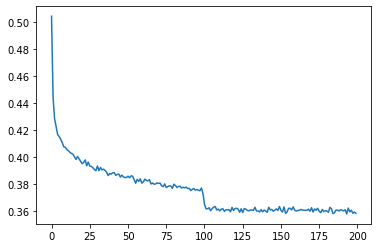

In [ ]:
plt.plot(torch.tensor(lossi).view(-1,1000).mean(1));

In [ ]:
@torch.no_grad()
def split_loss(split):
  x,y = {
      "train": {Xtr, Ytr},
      "val" : {Xdev, Ydev},
      "test": {Xte, Yte}
  }[split]

  emb = C[x]
  h = emb.view(-1,6)@ W1
  h = bngain * (h - bnmean) / bnstd + bnbias
  h = torch.tanh(h)

  logits = h @ W2 + B2
  loss = F.cross_entropy(logits, y)

  print(split, loss.item())

split_loss("train")
split_loss("val")
split_loss("test")

train 2.2629010677337646
val 2.2817766666412354
test 2.263972282409668


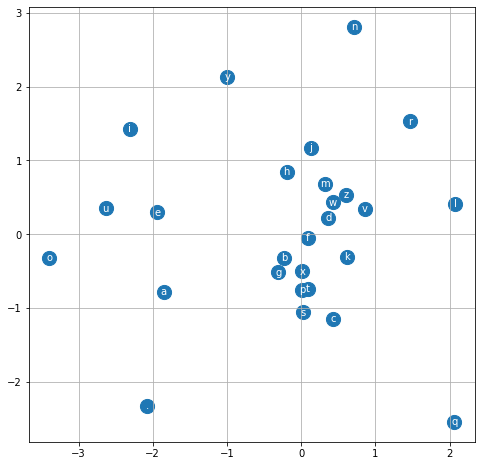

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)

for i in range(C.shape[0]):
  plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color="white")
plt.grid("minor")

In [ ]:
for _ in range(20):
  out = []
  context = [0] * block_size

  for _ in range(200):

      emb = C[torch.tensor([context])]
      h = emb.view(-1,6)@ W1
      h = bngain * (h - bnmean) / bnstd + bnbias
      h = torch.tanh(h)

      logits = h @ W2 + B2
      probs = F.softmax(logits, dim= 1)

      ix = torch.multinomial(probs, num_samples = 1).item()
      context = context[1:] + [ix]

      out.append(itos[ix])

      if(ix == 0): 
        break
  
  if out[:-1] in words:
    print("duplicate")

  print("".join(out[:-1]))

volitsea
aher
laylin
chomi
dontloxnelle
zahoweni
kaon
aam
nayah
oza
reon
elion
karon
aud
eeveagianneb
neca
sranyolla
vratane
andly
caa
